In [2]:
import pandas as pd
import networkx as nx

In [3]:
videos = pd.read_json("../shared-folder-gald/data/video-creators.json")

In [4]:
videos.head()

,username,video_description,region_code,share_count,hashtag_names,id,like_count,music_id,view_count,voice_to_text,comment_count,create_time,cluster,cluster-label,playlist_id,effect_ids
0,the.animal.holocaust,Replying to @ov10bronco #dominicizrealmyers #v...,US,4,"[vegan, yes, bbq, meat, carnivore, govegan, ve...",7274212644502998314,40,7.274213e+18,1054,"You say, why torture yourself? Because all we ...",181.0,2023-09-02 13:00:37,10,Healthy Cooking,NaN,NaN
1,bakemehealthylove,How to make: 1. Get Your Mix: Grab our Oatmeal...,US,4,"[wafflemix, waffleday, plantbased, strawberryw...",7271102720256314666,65,7.217848e+18,1087,Happy National Waffle Day we're celebrating wi...,0.0,2023-08-25 03:52:14,10,Healthy Cooking,NaN,NaN
2,livinapril7,Looking for a healthy #plantbased #protein pac...,US,0,"[food, healthy, lunch, health, salad, tasty, o...",7272105378920353054,2,6.705026e+18,271,NaN,0.0,2023-08-27 20:43:20,10,Healthy Cooking,NaN,NaN
3,goodvibessocietyofficial,"Pull up to Sprouts, grab those good vibes bott...",US,0,"[drinks, weekendvibes, sprouts, plantbased, su...",7271427012529524011,31,7.271427e+18,372,NaN,2.0,2023-08-26 00:50:41,-1,Outliers,NaN,NaN
4,settonfarms,"At Setton Farms, we are committed to sustainab...",US,1,"[nuts, recipe, farm, farmlife, harvest, pistac...",7273980908565433646,120,7.133309e+18,7031,NaN,2.0,2023-09-01 22:01:08,8,Gardening,NaN,NaN


In [5]:
hashtag_dict = videos.groupby('id')['hashtag_names'].apply(list).to_dict()

hashtag_set = [(video, hashtag) for video, hashtags in hashtag_dict.items() for hashtag in hashtags[0]]

# Create a DataFrame
hashtag_df = pd.DataFrame(hashtag_set, columns=['id', 'hashtag_names'])
hashtag_df

,id,hashtag_names
0,7151417313785335045,autumn
1,7151417313785335045,fall
2,7151417313785335045,gardening
3,7151417313785335045,gardeners
4,7151417313785335045,organicgardening
...,...,...
8856020,7426010179746991391,atlanticforest
8856021,7426085565751184672,nature
8856022,7426085565751184672,construction
8856023,7426085565751184672,hempcrete


In [6]:
# Select 10 random hashtags
random_hashtags = hashtag_df['hashtag_names'].drop_duplicates().sample(n=10, random_state=42)

# Filter dataframe for selected hashtags
filtered_df = hashtag_df[hashtag_df['hashtag_names'].isin(random_hashtags)]

print(filtered_df)

                          id             hashtag_names
708057   7165362671733198123          transylvania3000
2969963  7197637465904008453                   donates
3236648  7200971875697036590                  superfly
3328200  7202261849885396270  conservativemomsoftiktok
3594440  7205590656188681478                   donates
3701831  7206893446781553926                   donates
3723468  7207205107111382318                 tophotels
3765002  7207725725468658950         bulbousperennials
4000628  7210731375236795653                     trift
4475160  7217091052010868010          adultsonlycruise
4546939  7222853815299624235                  superfly
4587751  7223457488522333483         bulbousperennials
4612057  7223804569833180462       abercrombiebodysuit
4629822  7224044795113540890                     trift
4649481  7224272259404418347                  superfly
4679805  7224659176415415595         bulbousperennials
4861783  7227186162719378731          adultsonlycruise
4973545  7

In [7]:
# Select 10 random hashtags
random_hashtags = hashtag_df['hashtag_names'].drop_duplicates().sample(n=10, random_state=42)

# Filter dataframe for selected hashtags
filtered_df = hashtag_df[hashtag_df['hashtag_names'].isin(random_hashtags)]

# Save filtered data to CSV
filtered_df.to_csv("filtered_hashtags.csv", index=False)

print("Filtered DataFrame saved to 'filtered_hashtags.csv'")

Filtered DataFrame saved to 'filtered_hashtags.csv'


In [8]:
TGB = nx.Graph() # TGB - test graph bipartite
#for nodes

video_ids = set(filtered_df['id'])
hashtags = set(filtered_df['hashtag_names'])

TGB.add_nodes_from(video_ids, bipartite=0)  # First set (videos)
TGB.add_nodes_from(hashtags, bipartite=1)   # Second set (hashtags)

#for edges

for _, row in filtered_df.iterrows():
    TGB.add_edge(row['id'], row['hashtag_names'])

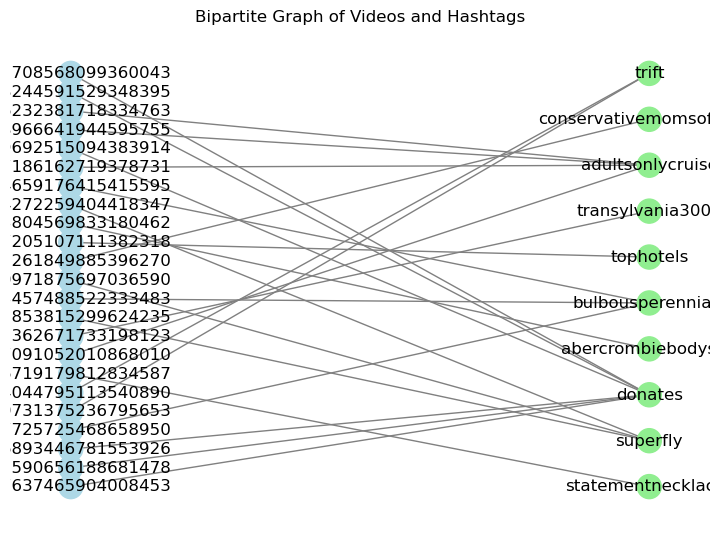

In [9]:
import matplotlib.pyplot as plt

#visualize 
plt.figure(figsize=(7, 5))
pos = nx.bipartite_layout(TGB, video_ids)  # Layout for bipartite graph
nx.draw(TGB, pos, with_labels=True, node_color=['lightblue' if node in video_ids else 'lightgreen' for node in TGB.nodes()], edge_color='gray')
plt.title("Bipartite Graph of Videos and Hashtags")
plt.show()

In [10]:
# projecting to a unipartite graph of hashtags
TG = nx.bipartite.weighted_projected_graph(TGB, hashtags, ratio=False) # TG = test graph
TG

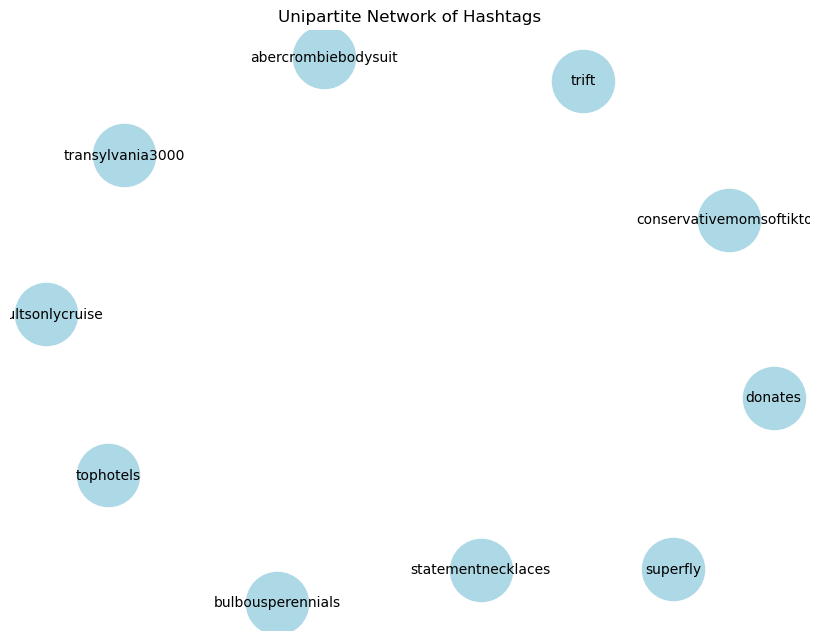

In [11]:
video_groups = filtered_df.groupby('id')['hashtag_names'].apply(list)

# Add edges between hashtags appearing in the same video
for hashtags in video_groups:
    for i in range(len(hashtags)):
        for j in range(i+1, len(hashtags)):
            TG.add_edge(hashtags[i], hashtags[j])

# Draw the network
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(TG)  # Layout for positioning
nx.draw(TG, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=10)
plt.title("Unipartite Network of Hashtags")
plt.show()